In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [20]:
warnings.filterwarnings("ignore")
filePath=r'C:\Users\Barış\Desktop\Data Visualization\VideoGamesSales.csv'
data=pd.read_csv(filePath)

In [21]:
print(data.head())
print(data.isnull().sum())
print(data.dtypes)
print(data.describe())

   index  Rank         Game Title Platform    Year     Genre Publisher  \
0      0     1         Wii Sports      Wii  2006.0    Sports  Nintendo   
1      1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo   
2      2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo   
3      3     4  Wii Sports Resort      Wii  2009.0    Sports  Nintendo   
4      4     5             Tetris       GB  1989.0    Puzzle  Nintendo   

   North America  Europe  Japan  Rest of World  Global  Review  
0          40.43   28.39   3.77           8.54   81.12   76.28  
1          29.08    3.58   6.81           0.77   40.24   91.00  
2          14.50   12.22   3.63           3.21   33.55   82.07  
3          14.82   10.51   3.18           3.01   31.52   82.65  
4          23.20    2.26   4.22           0.58   30.26   88.00  
index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europ

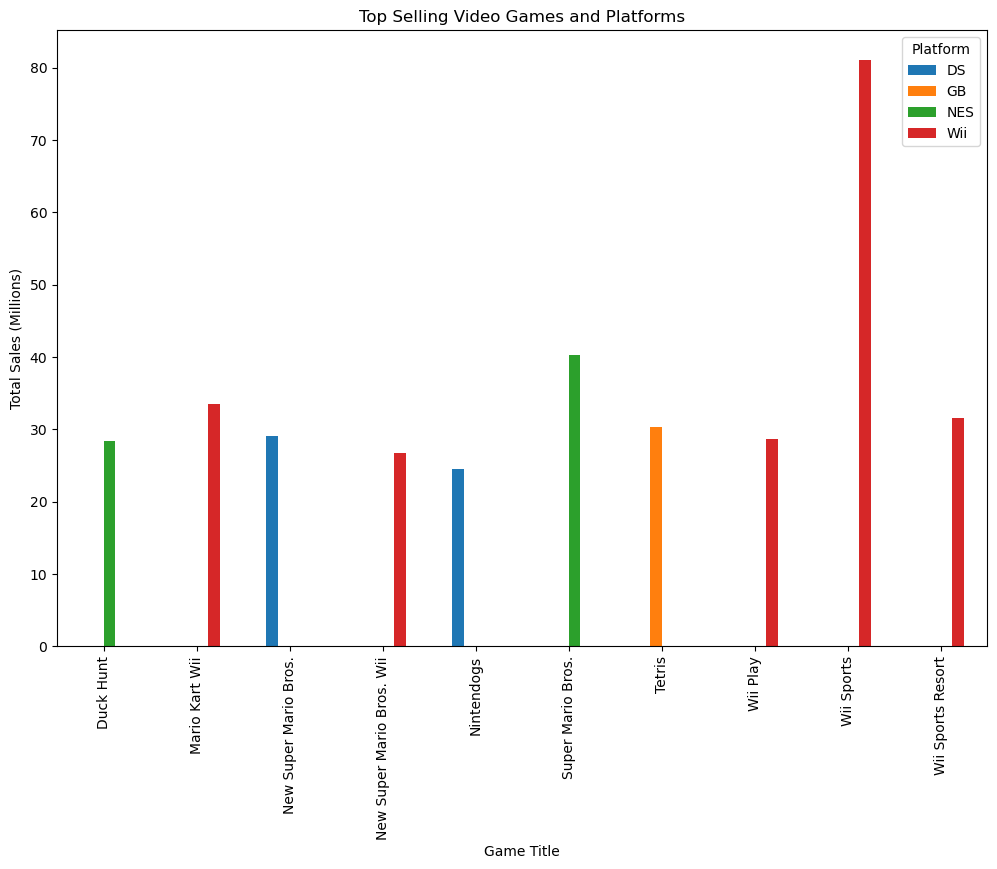

In [7]:
top_selling_games_by_platform = data.groupby(['Game Title', 'Platform'])['Global'].sum().nlargest(10)
top_selling_games_by_platform.unstack().plot(kind='bar', figsize=(12, 8), title='Top Selling Video Games and Platforms')
plt.ylabel('Total Sales (Millions)')
plt.show()

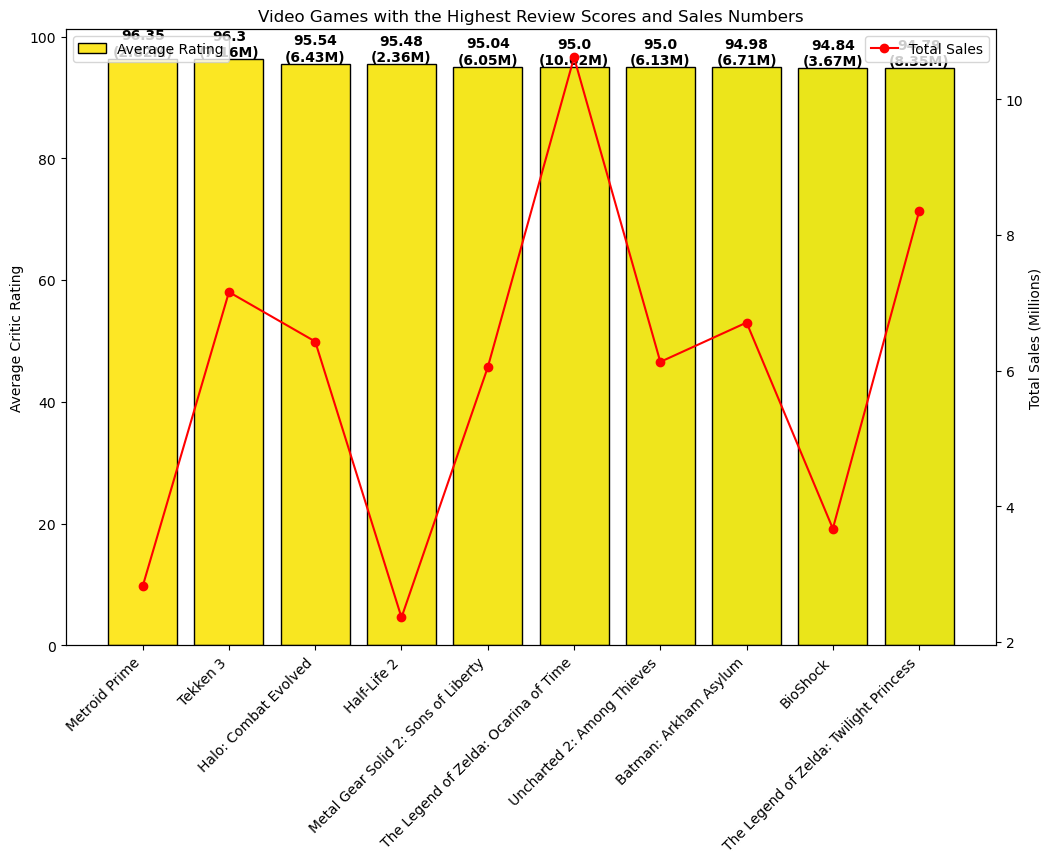

In [9]:
top_rated_games = data.groupby('Game Title').agg({'Review': 'mean', 'Global': 'sum'}).nlargest(10, 'Review')

colors = plt.cm.viridis_r(range(len(top_rated_games)))

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(top_rated_games.index, top_rated_games['Review'], color=colors, edgecolor='black', linewidth=1, label='Average Rating')
sales_ax = ax.twinx()  
sales_ax.plot(top_rated_games.index, top_rated_games['Global'], color='red', marker='o', label='Total Sales')
sales_ax.set_ylabel('Total Sales (Millions)')

for bar, sales in zip(bars, top_rated_games['Global']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)}\n({sales}M)", ha='center', va='bottom', color='black', fontweight='bold')

ax.set_title('Video Games with the Highest Review Scores and Sales Numbers')
ax.set_ylabel('Average Critic Rating')
ax.set_xticklabels(top_rated_games.index, rotation=45, ha='right')
ax.legend(loc='upper left')
sales_ax.legend(loc='upper right')

plt.show()

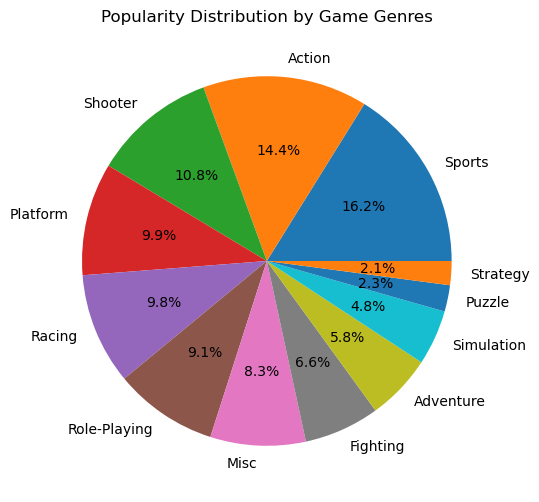

In [22]:
genre_popularity = data['Genre'].value_counts()
genre_popularity.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6), title='Popularity Distribution by Game Genres')
plt.ylabel('')

plt.show()

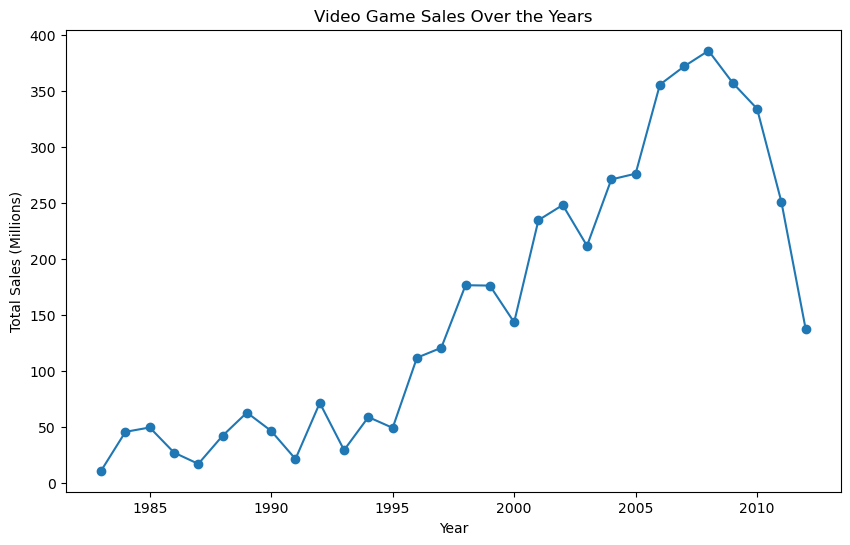

In [11]:
yearly_sales = data.groupby('Year')['Global'].sum()
yearly_sales.plot(kind='line', marker='o', figsize=(10, 6), title='Video Game Sales Over the Years')
plt.ylabel('Total Sales (Millions)')
plt.show()

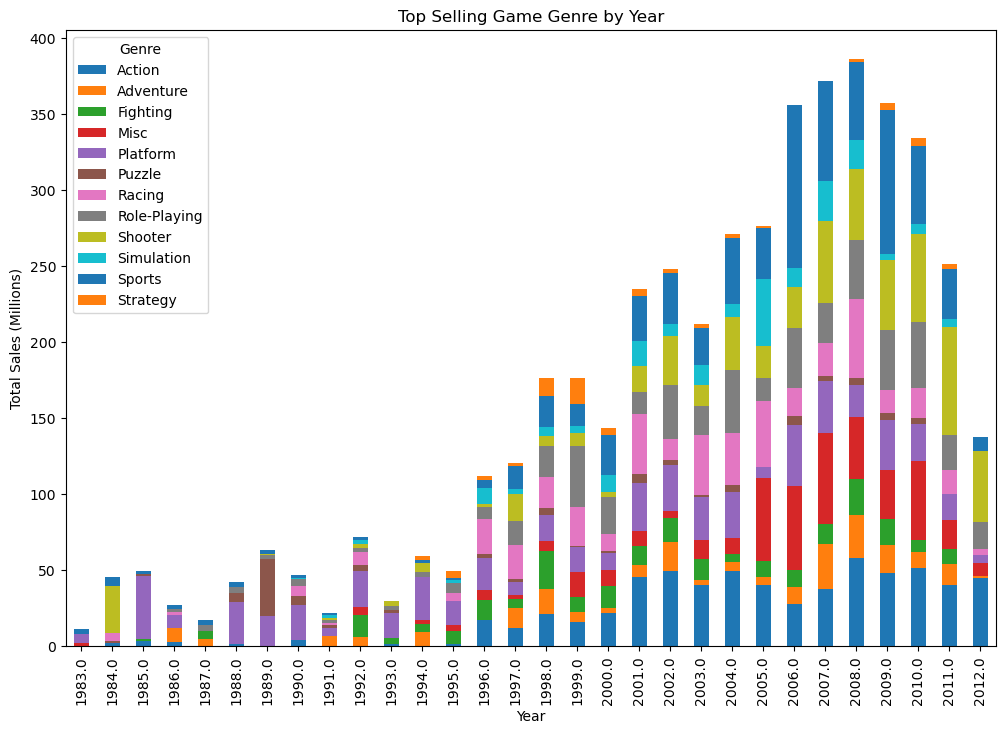

In [12]:
top_genre_by_year = data.groupby(['Year', 'Genre'])['Global'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 8),
                                                                                        title='Top Selling Game Genre by Year')
plt.ylabel('Total Sales (Millions)')
plt.show()

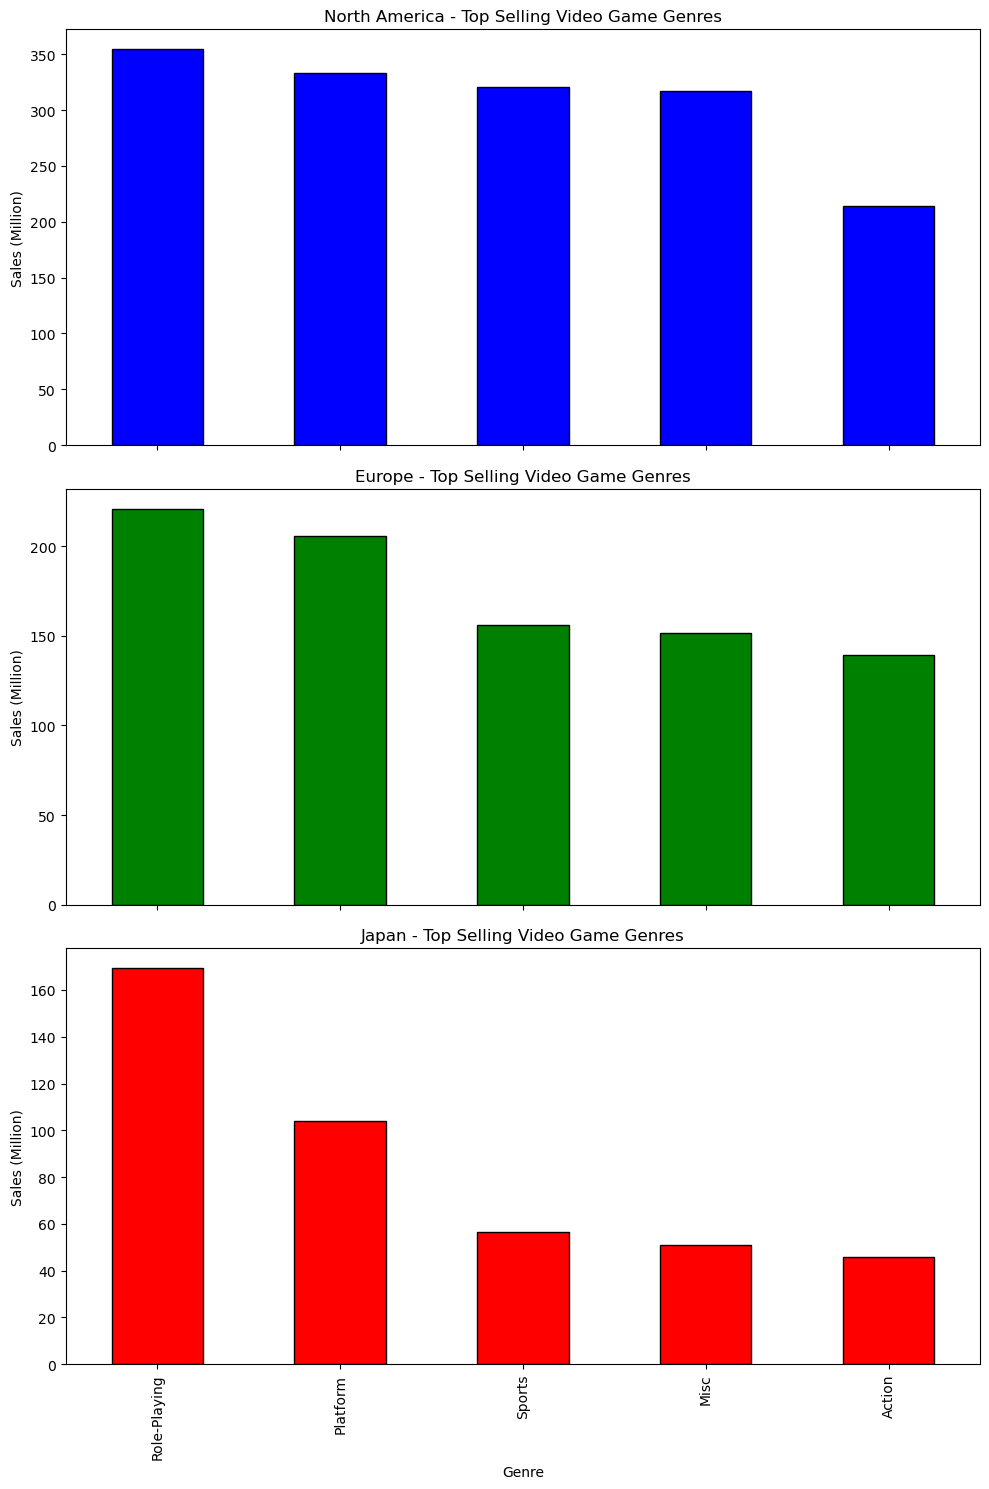

In [13]:
na_sales = data.groupby('Genre')['North America'].sum().nlargest(5)
eu_sales = data.groupby('Genre')['Europe'].sum().nlargest(5)
jp_sales = data.groupby('Genre')['Japan'].sum().nlargest(5)

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

na_sales.plot(kind='bar', ax=axes[0], color='blue', edgecolor='black', linewidth=1)
axes[0].set_ylabel('Sales (Million)')
axes[0].set_title('North America - Top Selling Video Game Genres')

eu_sales.plot(kind='bar', ax=axes[1], color='green', edgecolor='black', linewidth=1)
axes[1].set_ylabel('Sales (Million)')
axes[1].set_title('Europe - Top Selling Video Game Genres')

jp_sales.plot(kind='bar', ax=axes[2], color='red', edgecolor='black', linewidth=1)
axes[2].set_ylabel('Sales (Million)')
axes[2].set_title('Japan - Top Selling Video Game Genres')

plt.tight_layout()
plt.show()

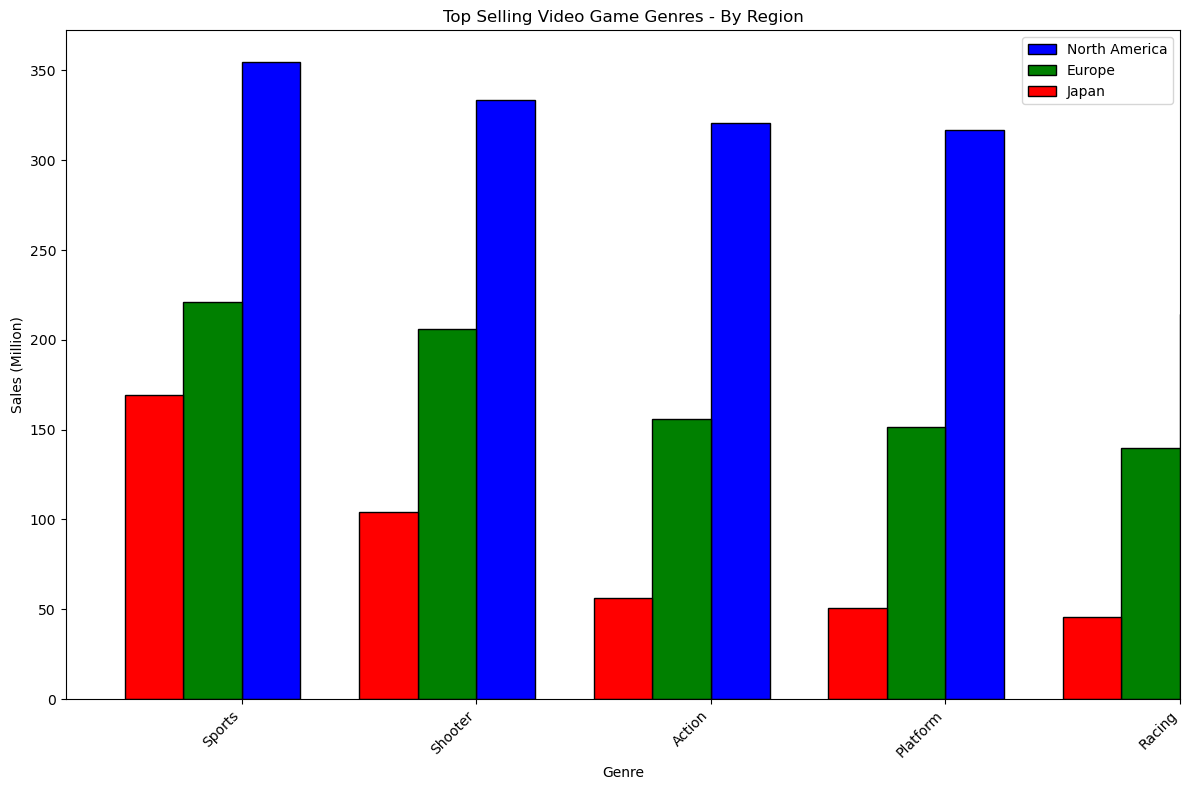

In [14]:
na_sales = data.groupby('Genre')['North America'].sum().nlargest(5)
eu_sales = data.groupby('Genre')['Europe'].sum().nlargest(5)
jp_sales = data.groupby('Genre')['Japan'].sum().nlargest(5)

fig, ax = plt.subplots(figsize=(12, 8))

na_sales.plot(kind='bar', ax=ax, position=0, width=0.25, color='blue', edgecolor='black', linewidth=1, label='North America')

eu_sales.plot(kind='bar', ax=ax, position=1, width=0.25, color='green', edgecolor='black', linewidth=1, label='Europe')

jp_sales.plot(kind='bar', ax=ax, position=2, width=0.25, color='red', edgecolor='black', linewidth=1, label='Japan')

ax.set_ylabel('Sales (Million)')
ax.set_title('Top Selling Video Game Genres - By Region')
ax.set_xticks(range(len(na_sales)))
ax.set_xticklabels(na_sales.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()

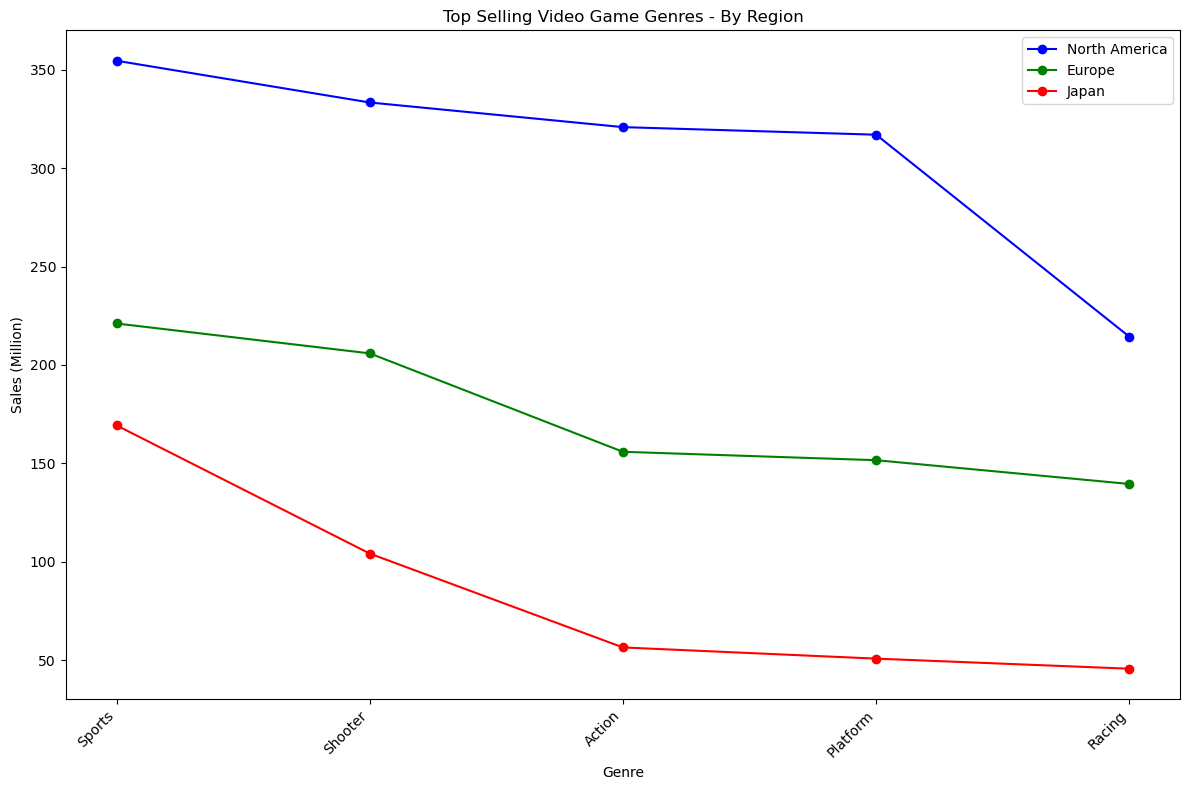

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

na_sales.plot(kind='line', ax=ax, color='blue', marker='o', label='North America')
eu_sales.plot(kind='line', ax=ax, color='green', marker='o', label='Europe')
jp_sales.plot(kind='line', ax=ax, color='red', marker='o', label='Japan')

ax.set_ylabel('Sales (Million)')
ax.set_title('Top Selling Video Game Genres - By Region')
ax.set_xticks(range(len(na_sales)))
ax.set_xticklabels(na_sales.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

plt.show()